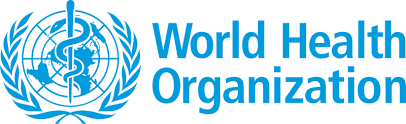

## **WHO Data**
Presented by the Line Masters
   - Hasan Cokgezici
   - Natalie Coyle
   - George Brignell-Cash
   - Iqra Finiin





#### **Imports and Data Upload**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.tools

In [ ]:
df = pd.read_csv("Life Expectancy Data.csv")

In [ ]:
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


#### **Looking into possible nulls values:**

We analysed the data to look for NULL values in the data.

In [ ]:
# There appears to be no nulls. They could be flagged as '0'
df.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

In [ ]:
zero_occurrences = (df == 0).sum().sum()

print("Number of occurrences of '0' in the dataset:", zero_occurrences)

Number of occurrences of '0' in the dataset: 2902


In [ ]:
zero_counts = (df == 0).sum()

print("Occurrences of '0' in each column:")
print(zero_counts)

Occurrences of '0' in each column:
Country                           0
Region                            0
Year                              0
Infant_deaths                     0
Under_five_deaths                 0
Adult_mortality                   0
Alcohol_consumption              38
Hepatitis_B                       0
Measles                           0
BMI                               0
Polio                             0
Diphtheria                        0
Incidents_HIV                     0
GDP_per_capita                    0
Population_mln                    0
Thinness_ten_nineteen_years       0
Thinness_five_nine_years          0
Schooling                         0
Economy_status_Developed       2272
Economy_status_Developing       592
Life_expectancy                   0
dtype: int64


The count of 0's is for if NULLS were counted as 0s. 0 appear in Economy status developed and Economy status developing because it is either 0 or 1. Alcohol consumption could be 0 if it is forbidden or frowned upon to have alcohol for example heavily populated Muslim countries.

### **More Database stats**


In [ ]:
# What are the data types in the data?
df.dtypes

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object

In [ ]:
# What are the names of the columns in our dataset?
df.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

In [ ]:
# How many rows and columns do we have in the data?
df.shape

(2864, 21)

In [ ]:
# An idea of the data in the 'Region' column
df.Region.value_counts()

Africa                           816
European Union                   432
Asia                             432
Central America and Caribbean    304
Rest of Europe                   240
Middle East                      224
South America                    192
Oceania                          176
North America                     48
Name: Region, dtype: int64

In [ ]:
# Statistics about the numerical data in the dataset
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


In [ ]:
df.describe(include='all')

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864,2864,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,...,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
unique,179,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Turkiye,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,...,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,NaN,NaN,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,...,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,NaN,NaN,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,...,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,NaN,NaN,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,...,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,NaN,NaN,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,...,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,NaN,NaN,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,...,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000


In [ ]:
# How many countries are in the data?
unique_country_count = df['Country'].nunique()
unique_country_count

179

In [ ]:
# How many entries does each country have per year?
df.Country.value_counts().sort_values()


Turkiye      16
Brazil       16
India        16
Guyana       16
Israel       16
             ..
Qatar        16
Fiji         16
Australia    16
Tunisia      16
Georgia      16
Name: Country, Length: 179, dtype: int64

In [ ]:
# Main statistics of 'Life expectancy' column - our target!
print(len(df)) ## count
print(np.mean(df.Life_expectancy)) ## mean
print(np.median(df.Life_expectancy)) ## median or Q2
print(min(df.Life_expectancy)) ## minimum
print(max(df.Life_expectancy)) ## maximum

2864
68.85607541899441
71.4
39.4
83.8


### **Countries with highest and lowest average Life Expectancy**

In [ ]:
# Ordering the Country column by Life expectancy
best_life_expectancy = df[['Country', 'Life_expectancy']].sort_values('Life_expectancy', ascending = False).head(10).copy()

In [ ]:
best_life = df.groupby('Country')[['Life_expectancy']].mean().sort_values('Life_expectancy', ascending=False).head(5).reset_index().copy()
best_life

,Country,Life_expectancy
0,Japan,82.45625
1,Switzerland,81.67500
2,Iceland,81.57500
3,Italy,81.38750
4,Australia,81.11250


Text(0.5, 1.0, 'Top 5 Countries by Average Life Expectancy')

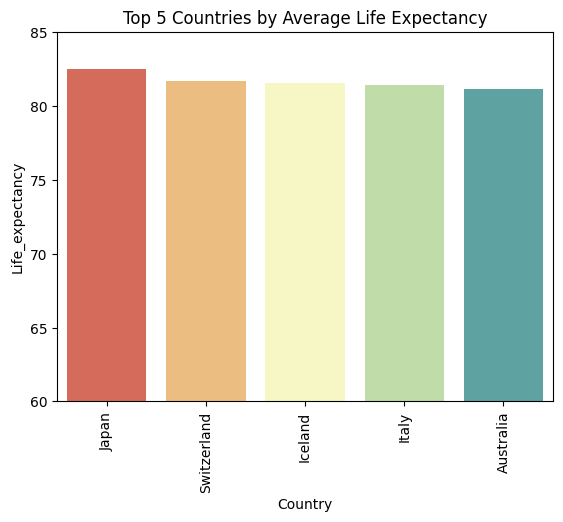

In [ ]:
# Barplot to show the top 5 countries with the highest life expectancy
sns.barplot(x = 'Country', ## column names
            y = 'Life_expectancy', ## bar height
            data = best_life,
            hue="Country",
            palette='Spectral',
            legend=False)
plt.xticks(rotation=90)
plt.ylim([60,85])
#plt.figure(figsize = (15,8))
#plt.show()
plt.title('Top 5 Countries by Average Life Expectancy')


In [ ]:
# Ordering the countries by the lowest life expectancy
lowest_life = df.groupby('Country')[['Life_expectancy']].mean().sort_values('Life_expectancy', ascending=True).head(5).reset_index().copy()

Text(0.5, 1.0, 'Bottom 5 Countries by Average Life Expectancy')

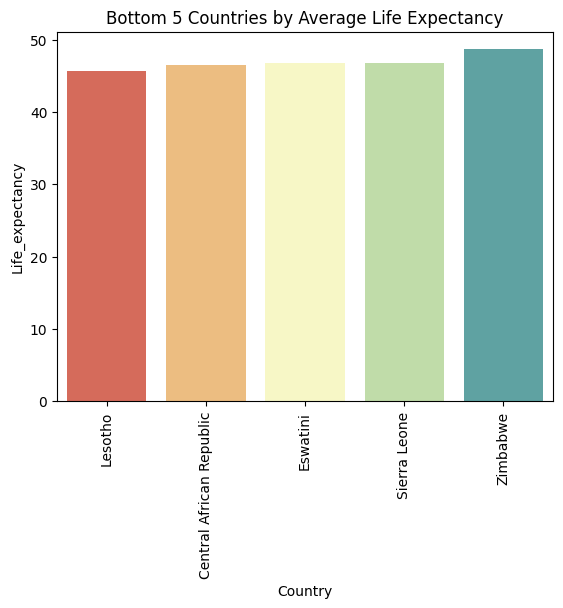

In [ ]:
# Barplot to show the 5 countries with the lowest life expectancy.
sns.barplot(x = 'Country', ## column names
            y = 'Life_expectancy', ## bar height
            data = lowest_life,
            hue='Country',
            palette='Spectral',
            legend=False)
plt.xticks(rotation=90)
#plt.ylim([60,85])
#plt.figure(figsize = (15,8))
#plt.show()
plt.title('Bottom 5 Countries by Average Life Expectancy')

#**Correlations**

Here we will try and find correlations in the data between the columns.

In [ ]:
df.corr()

<ipython-input-21-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
Year,1.000000e+00,-0.172402,-0.176393,-0.158660,-0.000611,0.176824,0.085945,0.161422,0.139858,0.145143,-0.081743,0.040998,0.015158,-0.044901,-0.048038,0.150539,-5.026601e-15,4.975598e-15,0.174359
Infant_deaths,-1.724017e-01,1.000000,0.985651,0.794661,-0.454526,-0.512562,-0.526282,-0.661988,-0.740790,-0.721875,0.349458,-0.512286,0.007622,0.491192,0.477639,-0.788513,-4.758662e-01,4.758662e-01,-0.920032
Under_five_deaths,-1.763926e-01,0.985651,1.000000,0.802361,-0.409367,-0.507427,-0.512972,-0.665255,-0.742983,-0.725355,0.369618,-0.469682,-0.005234,0.466978,0.450756,-0.773196,-4.271342e-01,4.271342e-01,-0.920419
Adult_mortality,-1.586596e-01,0.794661,0.802361,1.000000,-0.244794,-0.344882,-0.416153,-0.522866,-0.524226,-0.513803,0.699119,-0.510121,-0.053848,0.382140,0.379792,-0.581035,-4.293748e-01,4.293748e-01,-0.945360
Alcohol_consumption,-6.105222e-04,-0.454526,-0.409367,-0.244794,1.000000,0.168436,0.318603,0.284032,0.301926,0.299016,-0.034118,0.443966,-0.039119,-0.446366,-0.433030,0.615728,6.703661e-01,-6.703661e-01,0.399159
Hepatitis_B,1.768241e-01,-0.512562,-0.507427,-0.344882,0.168436,1.000000,0.429168,0.345421,0.724345,0.761780,-0.075782,0.159375,-0.082396,-0.208453,-0.213794,0.347643,1.135340e-01,-1.135340e-01,0.417804
Measles,8.594472e-02,-0.526282,-0.512972,-0.416153,0.318603,0.429168,1.000000,0.416321,0.514096,0.494059,-0.150580,0.313724,-0.098222,-0.340705,-0.366970,0.498391,2.986933e-01,-2.986933e-01,0.490019
BMI,1.614225e-01,-0.661988,-0.665255,-0.522866,0.284032,0.345421,0.416321,1.000000,0.457206,0.426501,-0.161142,0.336180,-0.166482,-0.596483,-0.599112,0.635475,2.432870e-01,-2.432870e-01,0.598423
Polio,1.398584e-01,-0.740790,-0.742983,-0.524226,0.301926,0.724345,0.514096,0.457206,1.000000,0.953178,-0.147952,0.313786,-0.033486,-0.312685,-0.306998,0.552765,2.832601e-01,-2.832601e-01,0.641217
Diphtheria,1.451429e-01,-0.721875,-0.725355,-0.513803,0.299016,0.761780,0.494059,0.426501,0.953178,1.000000,-0.146932,0.313321,-0.027336,-0.304466,-0.295597,0.535621,2.894172e-01,-2.894172e-01,0.627541


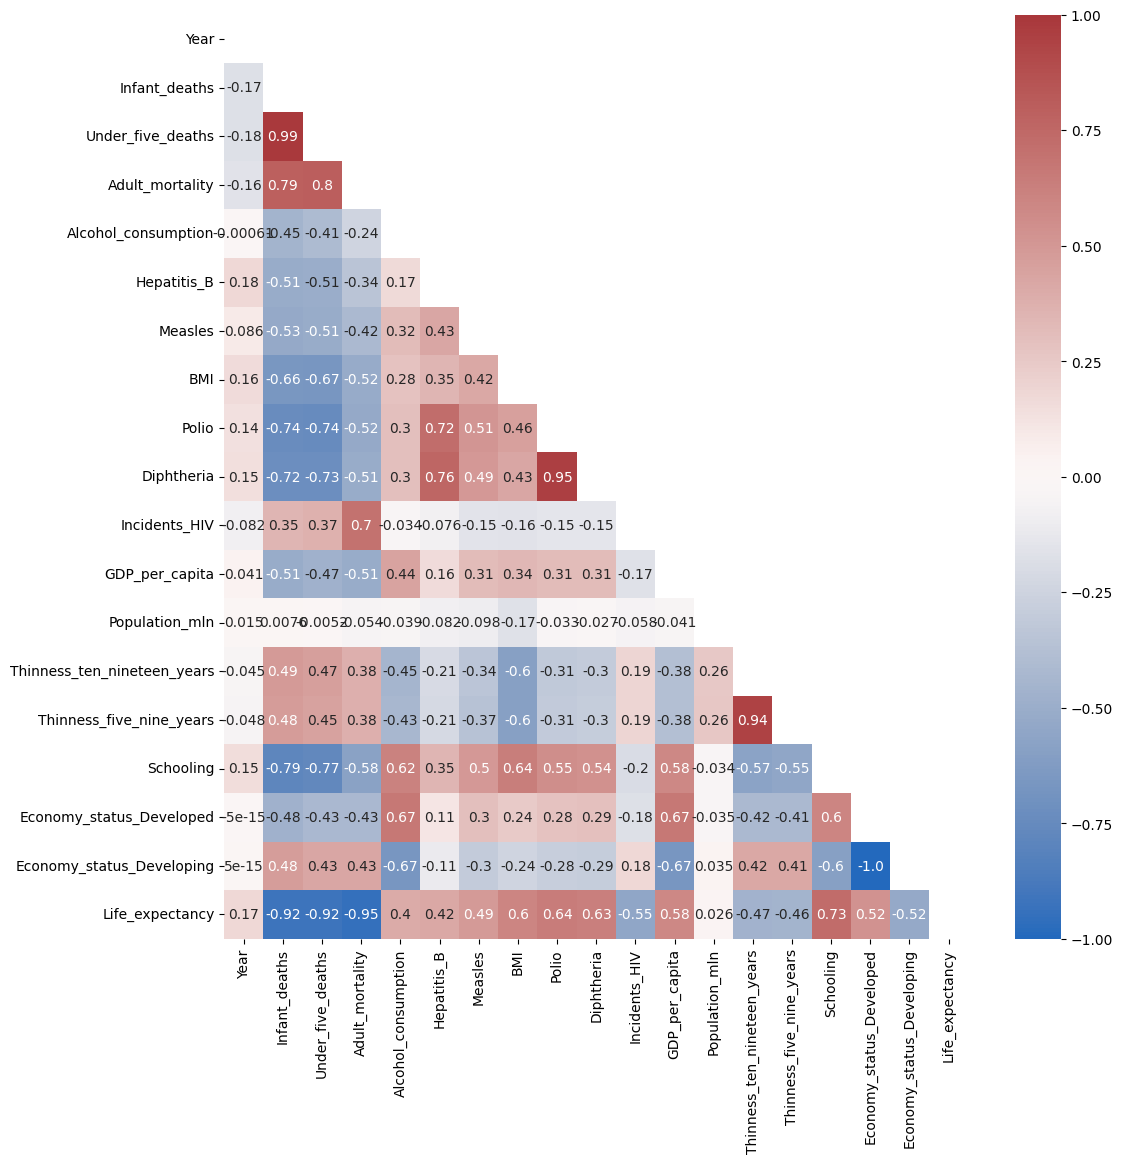

In [43]:
# Heatmap to show the correlation between the columns.
plt.figure(figsize = (12, 12))
sns.heatmap(df.corr(numeric_only=True),
            annot = True,
            fmt = '.2',
            cmap = 'vlag',
            mask = np.triu(df.corr(numeric_only=True)),
            vmin = -1,
            vmax = 1)

plt.show()

**Main Correlated areas:**
- Infant_deaths
- Under_five_deaths
- Adult_mortality
- BMI
- Polio
- Diphtheria
- GDP_per_capita
- Schooling

## **Boxplots for highly correlated columns:**



*   Infant deaths
*   Under five deaths
*   Adult mortality

The use of these boxplots is to see any outliers in the data, and if they will effect our data.





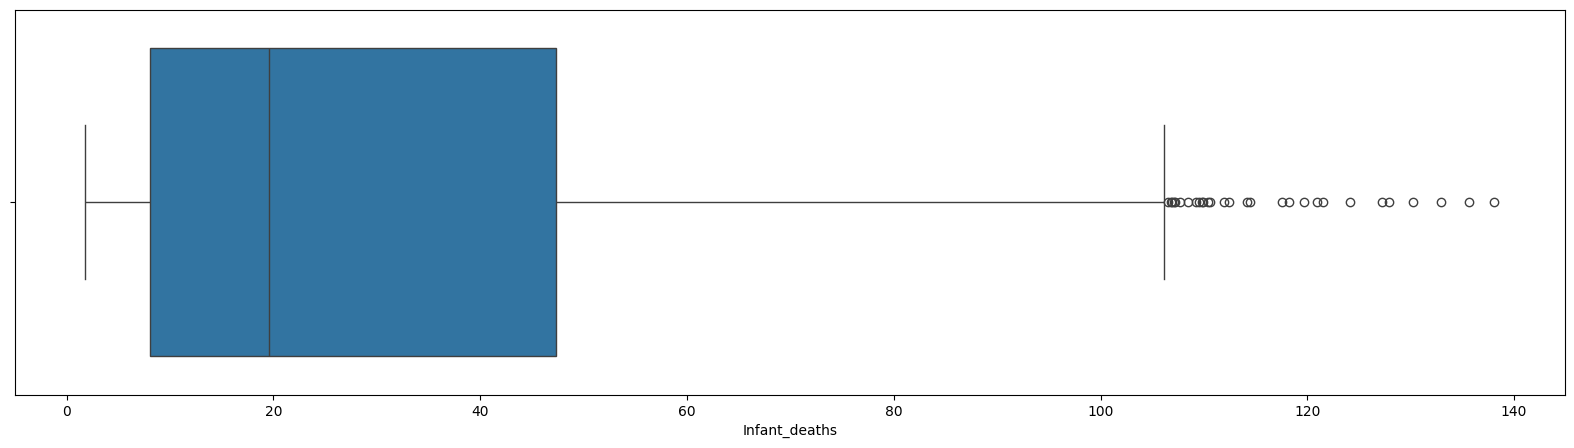

In [ ]:
# Boxplot to show any outliers in the 'Infant deaths' data
plt.figure(figsize = (20, 5))
sns.boxplot(data = df['Infant_deaths'],
            orient = 'h')
plt.show()

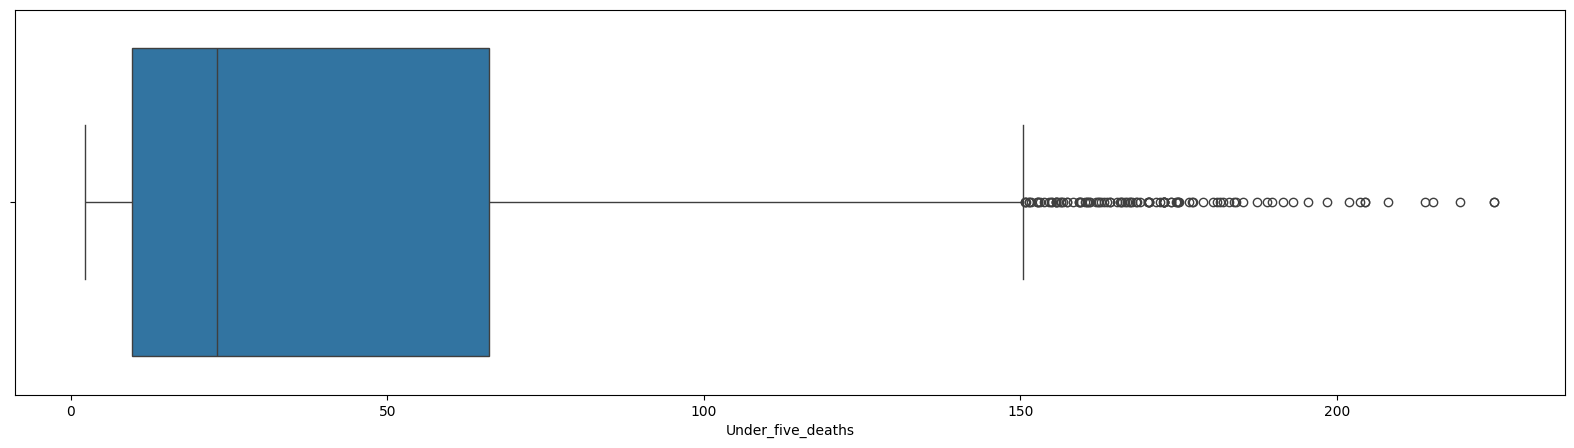

In [ ]:
# Boxplot to show any outliers in the 'Under five deaths' data
plt.figure(figsize = (20, 5))
sns.boxplot(data = df['Under_five_deaths'],
            orient = 'h')
plt.show()

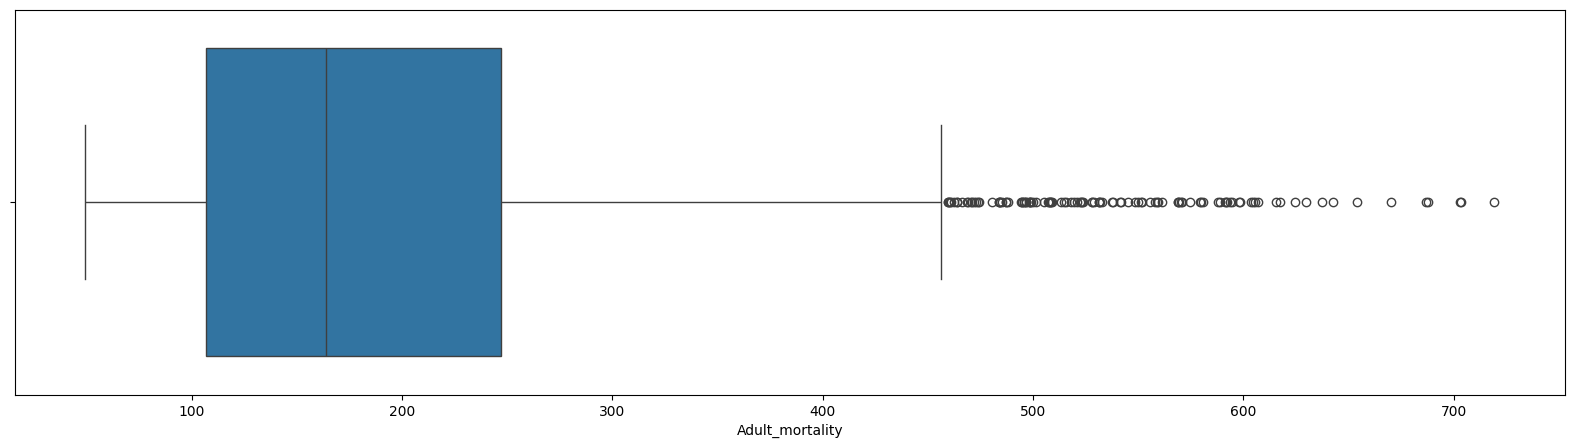

In [ ]:
# Boxplot to show any outliers in the 'Adult mortality' data
plt.figure(figsize = (20, 5))
sns.boxplot(data = df['Adult_mortality'],
            orient = 'h')
plt.show()

## **Scatter Plot: Average life Expectancy increases over the years**

This is a scatterplot to show the relationship between 'Year' and the life expectancy. However, it is important to note that a country or region could have improved in other areas as the years went on.

<Axes: ylabel='Life_expectancy'>

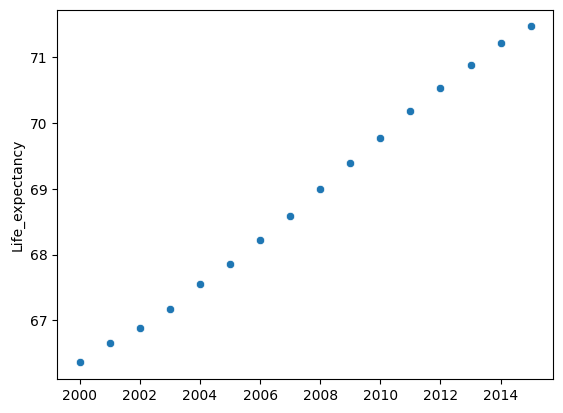

In [ ]:
sns.scatterplot(x = df["Year"].sort_values().unique(),y = df.groupby("Year")["Life_expectancy"].mean())

## **Boxplots for columns (grouped by the year)**:
* Life Expectancy
* Infant deaths
* Under five deaths
* Adult mortality

This is to see the changes within these values over the years.

Text(0.5, 0.98, '')

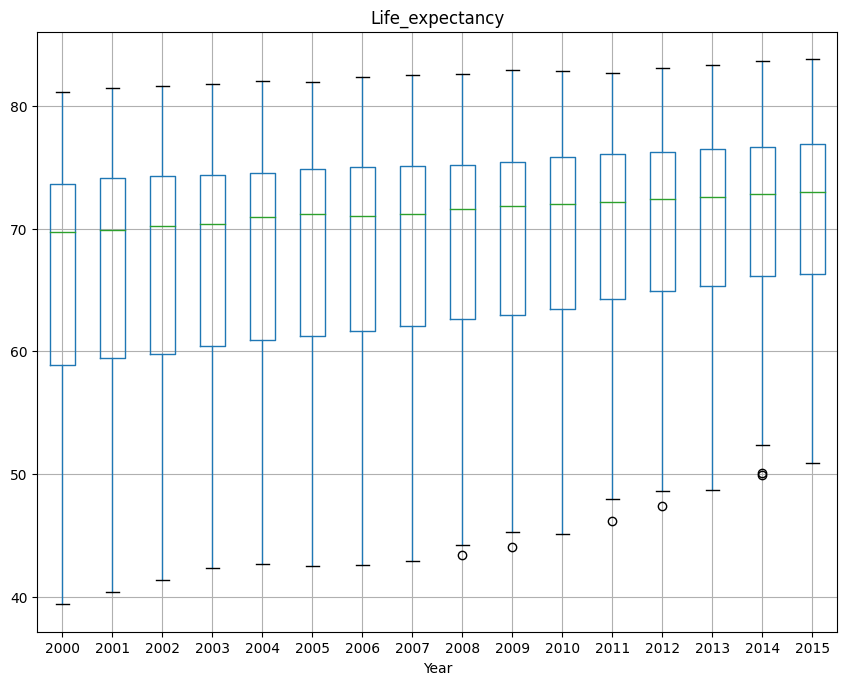

In [ ]:
# Boxplot to show life expectancy over the years
# https://stackoverflow.com/questions/18498690/boxplot-with-pandas-groupby-multiindex-for-specified-sublevels-from-multiindex
fig, ax = plt.subplots(figsize=(10,8))
df.boxplot(column=['Life_expectancy'], by='Year', ax = ax)
plt.suptitle('')

Text(0.5, 0.98, '')

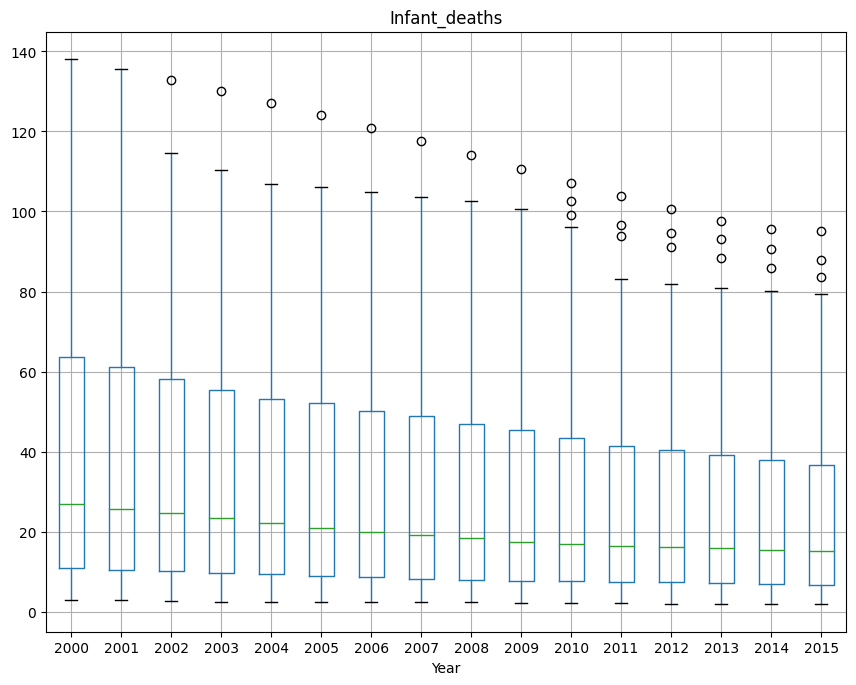

In [ ]:
# Boxplot to show infant deaths over the years
fig, ax = plt.subplots(figsize=(10,8))
df.boxplot(column=['Infant_deaths'], by='Year', ax = ax)
plt.suptitle('')

Text(0.5, 0.98, '')

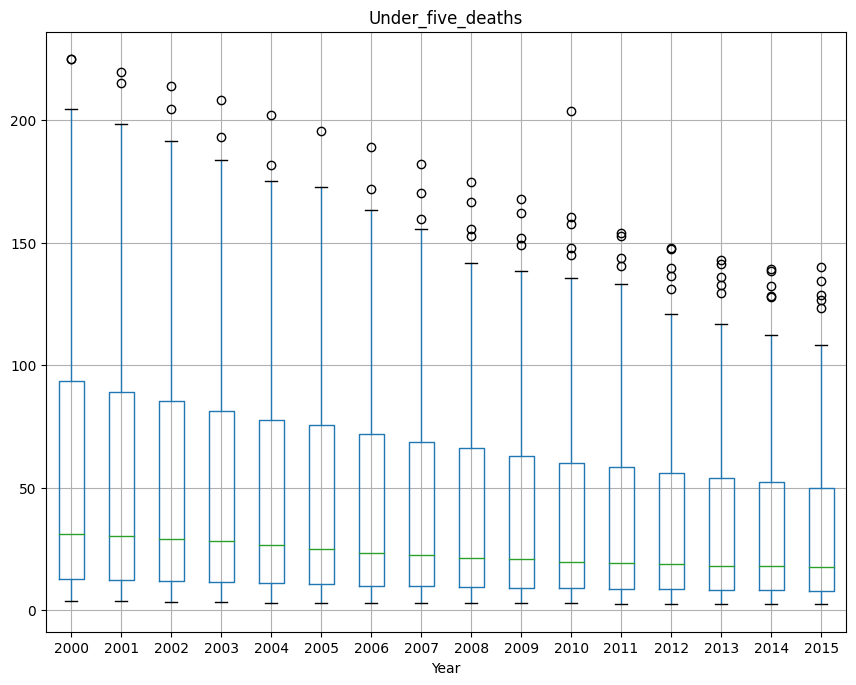

In [ ]:
# Boxplot to show under five deaths over the years
fig, ax = plt.subplots(figsize=(10,8))
df.boxplot(column=['Under_five_deaths'], by='Year', ax = ax)
plt.suptitle('')

Text(0.5, 0.98, '')

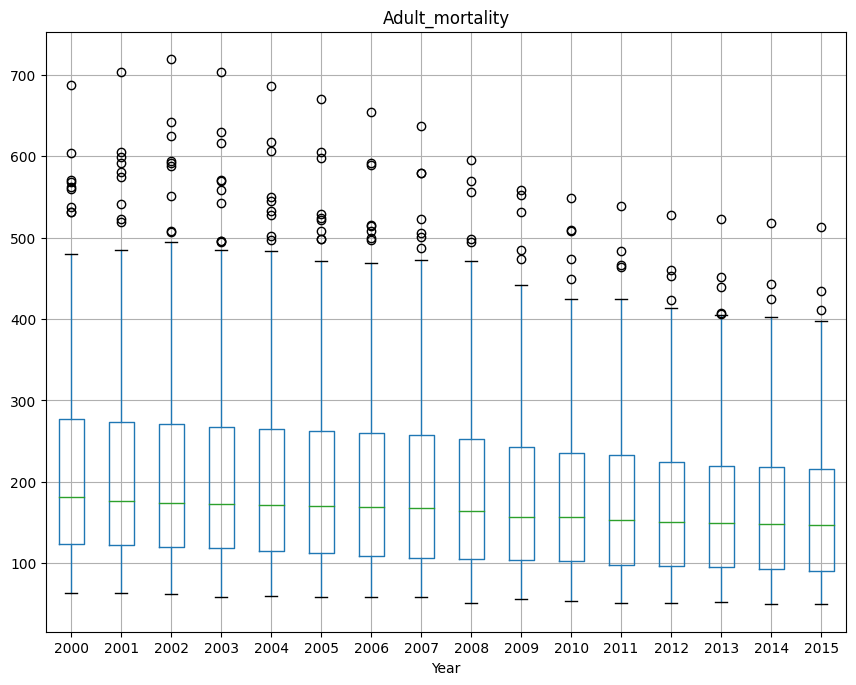

In [ ]:
# Boxplot to show adult mortality over the years
fig, ax = plt.subplots(figsize=(10,8))
df.boxplot(column=['Adult_mortality'], by='Year', ax = ax)
plt.suptitle('')

## **Histograms and KDE Plots for columns:**

*   Infant deaths
*   Under five deaths
*   Adult mortality

This is to see distributions in the data.

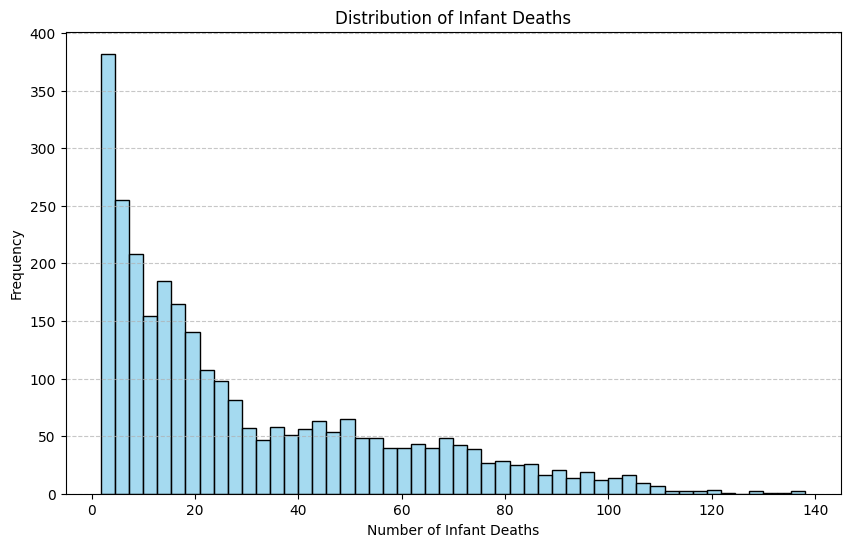

In [ ]:
# Histogram to see the distribution of the infant deaths
plt.figure(figsize=(10, 6))
sns.histplot(df['Infant_deaths'],
             bins=50,
             kde=False,
             color='skyblue')
plt.title('Distribution of Infant Deaths')
plt.xlabel('Number of Infant Deaths')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()

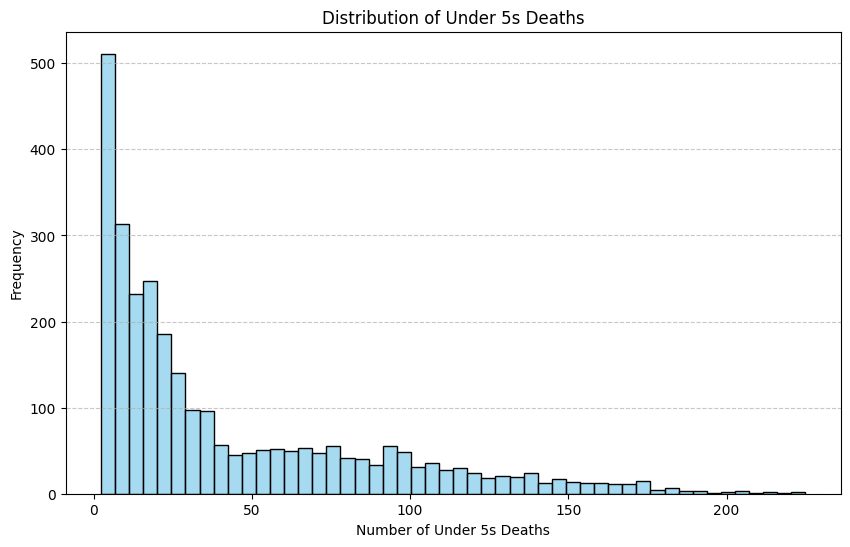

In [ ]:
# Histogram to see the distribution of the under five deaths
plt.figure(figsize=(10, 6))
sns.histplot(df['Under_five_deaths'],
             bins=50,
             kde=False,
             color='skyblue')
plt.title('Distribution of Under 5s Deaths')
plt.xlabel('Number of Under 5s Deaths')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()

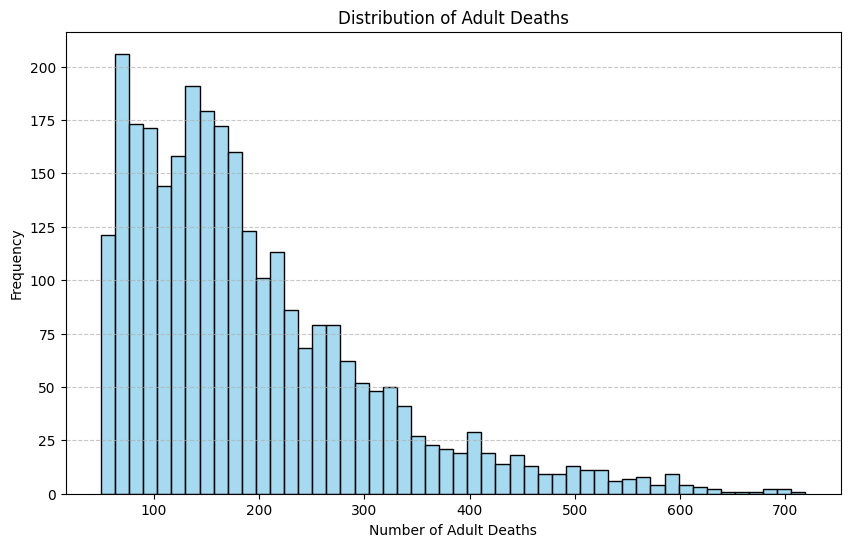

In [ ]:
# Histogram to see the distribution of the adult mortality
plt.figure(figsize=(10, 6))
sns.histplot(df['Adult_mortality'],
             bins=50,
             kde=False,
             color='skyblue')
plt.title('Distribution of Adult Deaths')
plt.xlabel('Number of Adult Deaths')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

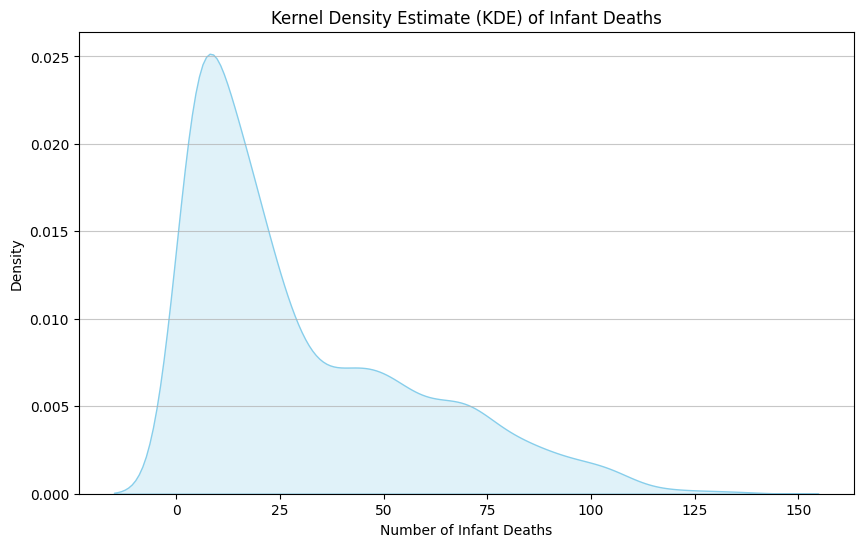

In [ ]:
# KDE plot to see the distribution of the infant deaths
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Infant_deaths'],
            color='skyblue',
            fill=True)
plt.title('Kernel Density Estimate (KDE) of Infant Deaths')
plt.xlabel('Number of Infant Deaths')
plt.ylabel('Density')
plt.grid(axis='y', alpha=0.7)
plt.show()

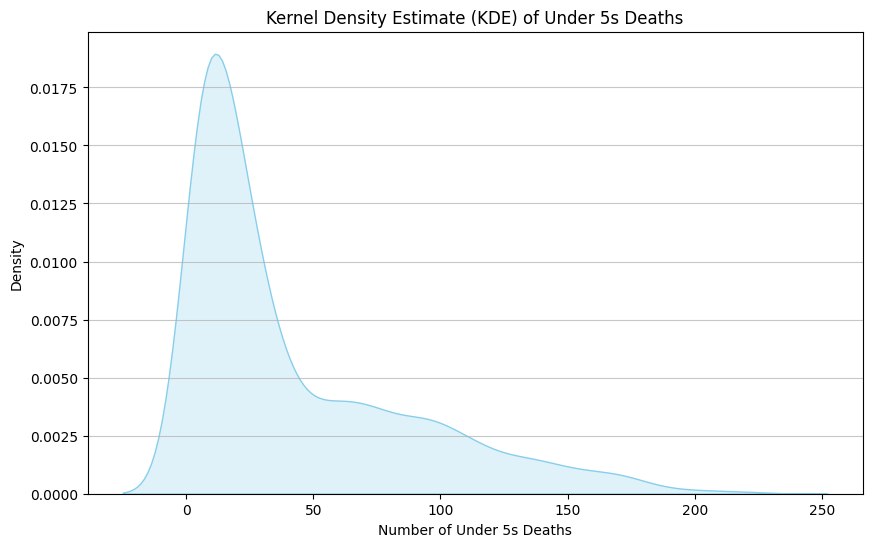

In [ ]:
# Histogram to see the distribution of the under five deaths
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Under_five_deaths'],
            color='skyblue',
            fill=True)
plt.title('Kernel Density Estimate (KDE) of Under 5s Deaths')
plt.xlabel('Number of Under 5s Deaths')
plt.ylabel('Density')
plt.grid(axis='y', alpha=0.7)
plt.show()

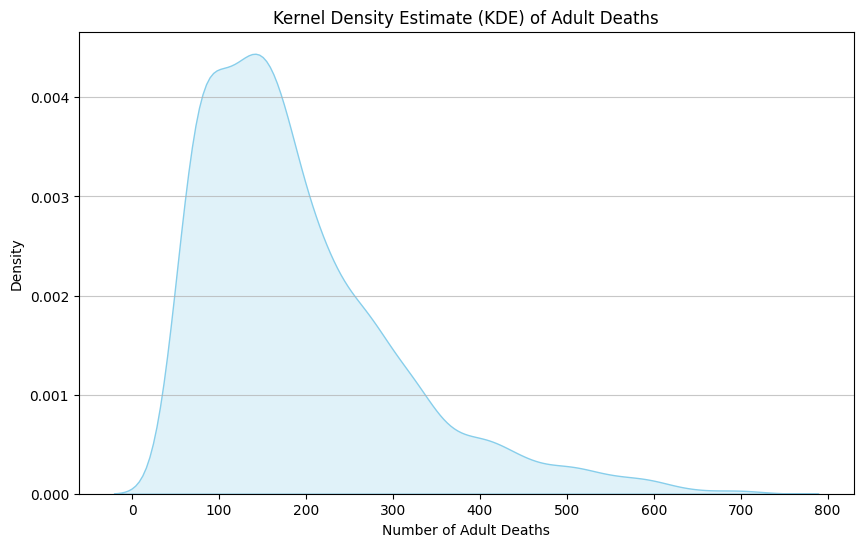

In [ ]:
# Histogram to see the distribution of the adult mortality
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Adult_mortality'],
            color='skyblue',
            fill=True)
plt.title('Kernel Density Estimate (KDE) of Adult Deaths')
plt.xlabel('Number of Adult Deaths')
plt.ylabel('Density')
plt.grid(axis='y', alpha=0.7)
plt.show()

##**Pairplots for correlation**

The most highly correlated columns with life expectancy are
Adult mortality, Under five deaths and Infant mortality. The pairplots below illustrate the correlations between them.

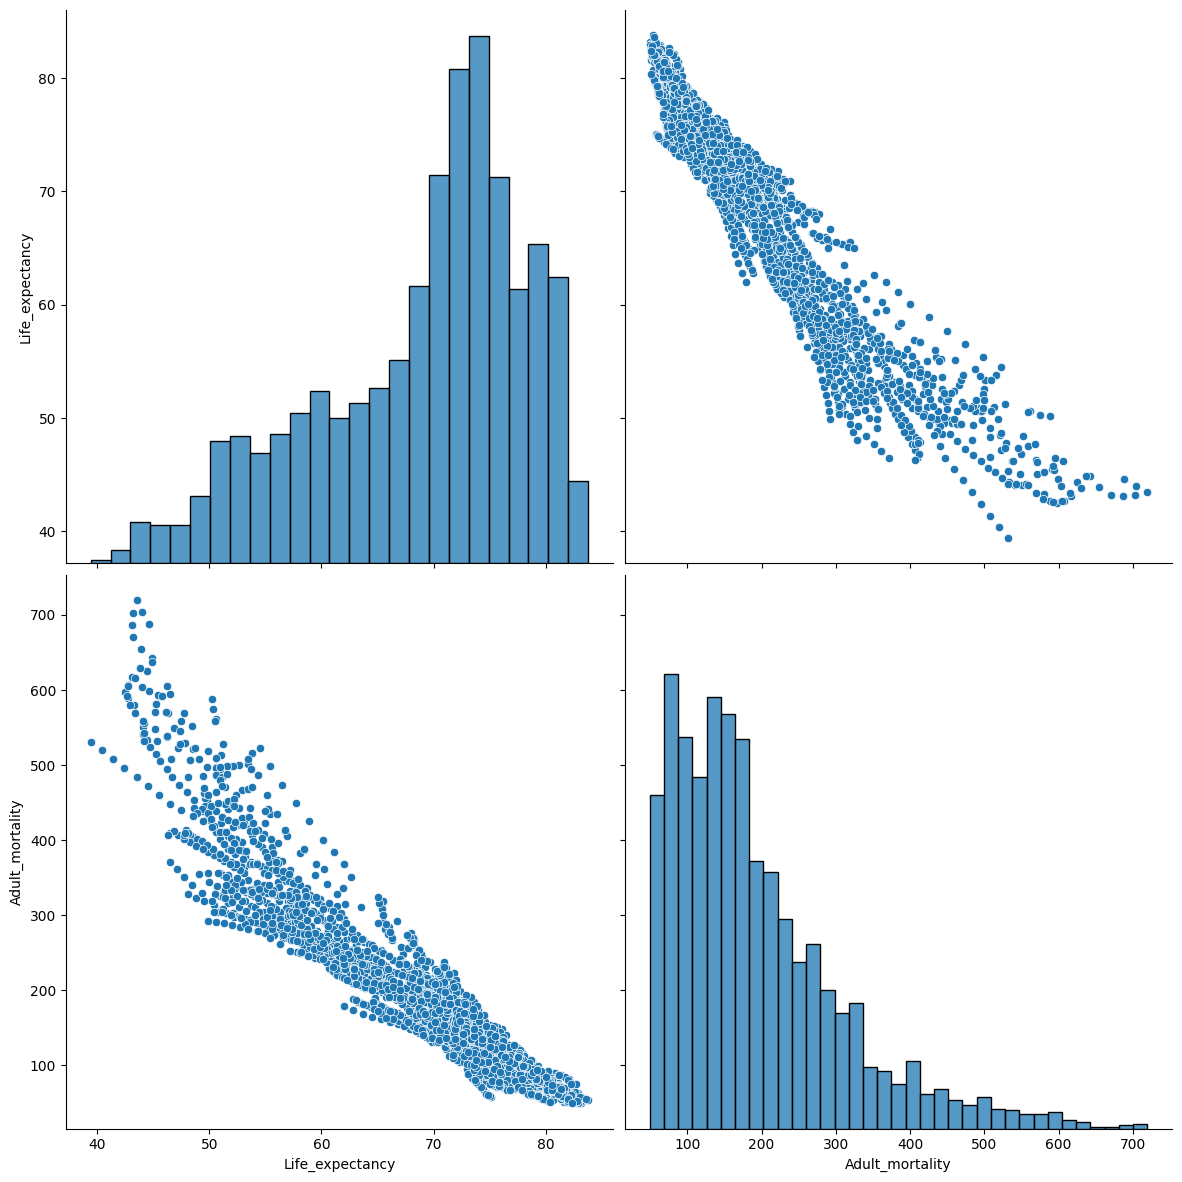

In [ ]:
#Pairplot for Adult_mortality and Life_expectancy

sns.pairplot(df[['Life_expectancy', 'Adult_mortality']], height = 6)
plt.show()

In [ ]:
df1 = df.copy()

Here we made adult mortality an exponential to see clearly the outlier in the data that could affect our model.

In [ ]:
df1['Adult_mortality_ex'] =  np.exp(df1['Adult_mortality']) # we use numpy's exponential function

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Life_expectancy', ylabel='Adult_mortality_ex'>

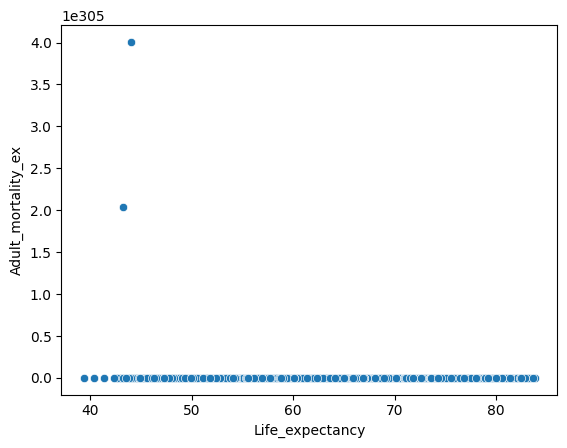

In [ ]:
## Looking at exponential to get a clearer picture of Adult_mortality

sns.scatterplot(x='Life_expectancy',
                y = 'Adult_mortality_ex',
                data = df1)



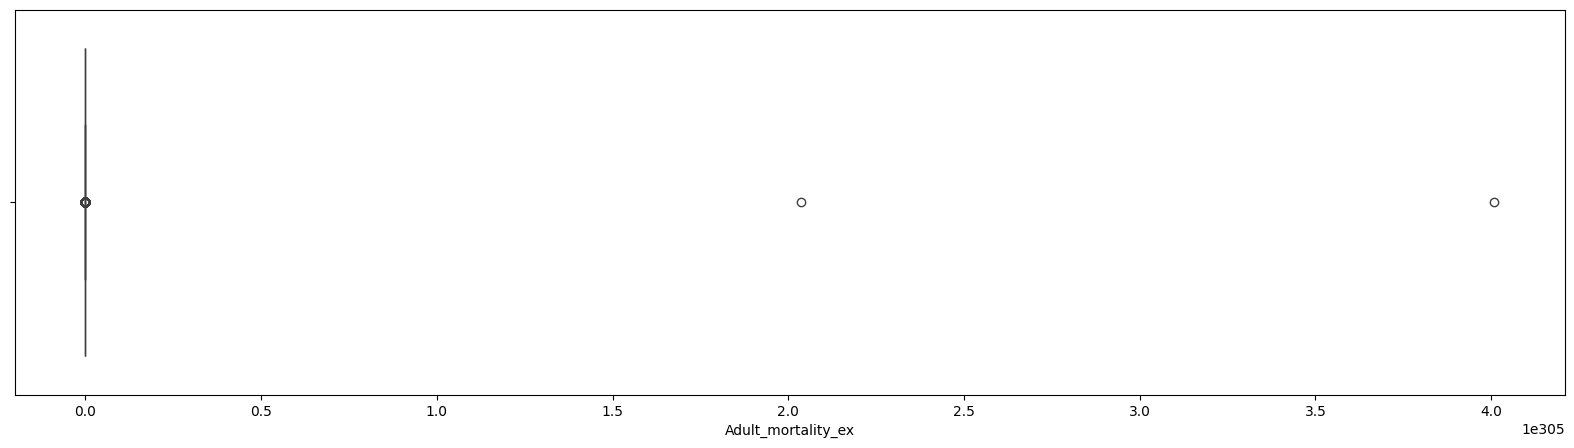

In [ ]:
# Boxplot to show the outliers with Adult mortality exponential.
plt.show()

plt.figure(figsize = (20, 5))
sns.boxplot(data = df1['Adult_mortality_ex'],
            orient = 'h')
plt.show()

#### From this we can determine that there are two outliers in Adult mortality, under 5 deaths and infant_deaths.

In [ ]:
outlier_filter = df1['Adult_mortality_ex'] == max

In [ ]:
df1['Adult_mortality_ex'].max()

inf

In [ ]:
df1.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,Adult_mortality_ex
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2.864000e+03
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075,inf
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608,NaN
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000,2.800262e+21
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000,2.695645e+46
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000,1.431008e+71
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000,1.547426e+107
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000,inf


In [ ]:
# Checking if it mapped over correctly
len(df1['Adult_mortality_ex']) == len(df1['Adult_mortality'])

True

In [ ]:
df['Adult_mortality'].max()

719.3605

In [ ]:
df1.sort_values(by='Adult_mortality_ex', ascending=False)
## 2515 looks normal but was an outlier in exponential form
## 848 looks normal but was an outlier in exponential form

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,Adult_mortality_ex
2515,Zimbabwe,Africa,2002,50.7,92.6,719.3605,2.39,73,64,23.3,...,11.04,1559,11.95,1.2,1.3,6.9,0,1,43.5,inf
848,Zimbabwe,Africa,2001,51.1,93.8,703.6770,1.93,76,64,23.3,...,11.96,1715,11.92,1.6,1.7,6.7,0,1,44.0,4.009019e+305
681,Zimbabwe,Africa,2003,50.4,91.6,703.0000,1.96,70,64,23.4,...,10.27,1291,11.98,9.8,9.9,6.8,0,1,43.2,2.037140e+305
171,Zimbabwe,Africa,2000,51.9,95.5,687.9930,1.89,79,64,23.3,...,12.86,1697,11.88,11.0,11.2,6.5,0,1,44.6,6.188188e+298
60,Zimbabwe,Africa,2004,51.2,92.4,686.6390,2.48,68,64,23.4,...,9.75,1212,12.02,9.4,9.4,6.8,0,1,43.1,1.597823e+298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,Singapore,Asia,2015,2.2,2.7,50.9615,1.82,96,90,23.6,...,0.07,55647,5.54,2.2,2.2,11.5,0,1,82.7,1.356120e+22
1132,Iceland,Rest of Europe,2012,2.0,2.5,50.6180,6.82,88,97,26.1,...,0.05,49192,0.32,1.0,0.9,11.5,1,0,82.9,9.618738e+21
2863,Iceland,Rest of Europe,2011,2.1,2.6,50.5745,6.84,88,90,26.1,...,0.05,48934,0.32,0.9,0.9,11.0,1,0,82.4,9.209293e+21
84,Switzerland,Rest of Europe,2014,3.8,4.3,49.9980,9.62,88,87,25.1,...,0.05,84348,8.19,0.4,0.3,13.4,1,0,83.2,5.174346e+21


In [ ]:
df1.sort_values(by='Infant_deaths', ascending=False)

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,Adult_mortality_ex
1417,Sierra Leone,Africa,2000,138.1,224.9,531.3245,3.75,71,60,22.0,...,1.59,403,4.58,1.3,1.4,2.3,0,1,39.4,5.640251e+230
1815,Sierra Leone,Africa,2001,135.6,219.4,519.6305,3.98,71,60,22.1,...,1.57,364,4.75,1.1,1.2,2.4,0,1,40.4,4.706074e+225
1923,Sierra Leone,Africa,2002,132.9,213.9,507.9370,3.90,71,60,22.2,...,1.53,441,4.97,9.9,1.0,2.5,0,1,41.4,3.928586e+220
2803,Sierra Leone,Africa,2003,130.2,208.1,495.8585,3.87,72,60,22.2,...,1.49,460,5.20,9.7,9.8,2.5,0,1,42.4,2.231569e+215
261,Liberia,Africa,2000,127.9,189.7,316.5890,4.47,58,64,23.0,...,3.50,776,2.85,9.2,9.2,3.5,0,1,51.7,3.110683e+137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,Japan,Asia,2015,2.0,2.7,53.5860,8.55,83,93,22.7,...,0.17,34961,127.14,2.1,1.8,12.5,1,0,83.8,1.871131e+23
1063,Finland,European Union,2015,2.0,2.5,68.8685,8.52,88,92,25.9,...,0.08,42802,5.48,0.9,0.8,12.4,1,0,81.5,8.113524e+29
945,Iceland,Rest of Europe,2014,1.9,2.4,55.2385,7.01,88,93,26.2,...,0.05,51233,0.33,1.0,0.9,12.2,1,0,82.9,9.767327e+23
863,Iceland,Rest of Europe,2013,1.9,2.4,53.1585,6.80,88,94,26.1,...,0.05,50947,0.32,1.0,0.9,11.9,1,0,82.1,1.220234e+23



*   1417 looks normal but looked odd in exponential form
*   1815 looks normal but looked odd in exponential form

It is important to note that this could affect our model. We decided to keep these values in our data and keep note if it had an effect on our model.

## **Scatter Plots:**


Life Expectancy Against:
- Infant Deaths
- Infant Death Exponential
- Under Five Deaths
- Under Five Deaths Exponential
- Adult Mortality
- Adult Mortality Exponential

These scatter plots show the correlation these columns have on life expectancy, illustrating main outliers.

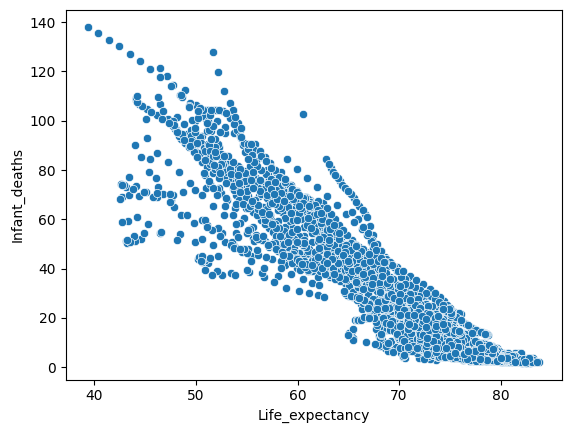

In [ ]:
# Life expectancy vs Infant Deaths
sns.scatterplot(x = 'Life_expectancy',
                y = 'Infant_deaths',
                data = df)

plt.show()

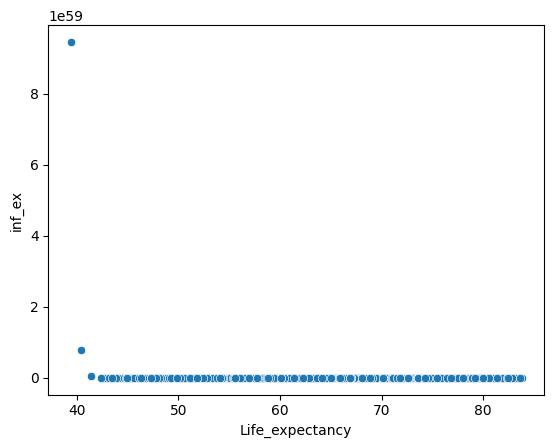

In [ ]:
# Find Exponential
df1['inf_ex'] =  np.exp(df['Infant_deaths'])

# Life expectancy vs exp(Infant Deaths)
sns.scatterplot(x = 'Life_expectancy',
                y = 'inf_ex',
                data = df1)

plt.show()

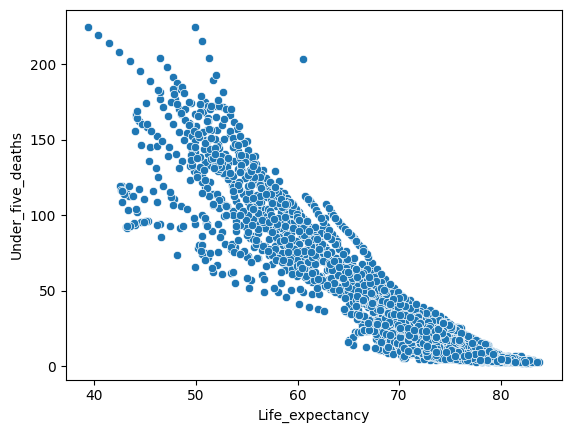

In [ ]:
# Life expectancy vs Under 5 deaths
sns.scatterplot(x = 'Life_expectancy',
                y = 'Under_five_deaths',
                data = df)

plt.show()

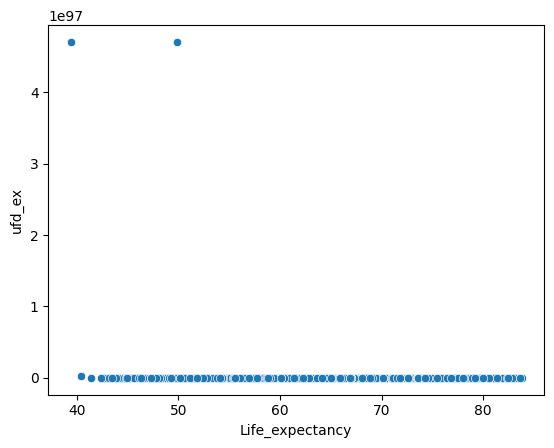

In [ ]:
# Find Exponential
df1['ufd_ex'] =  np.exp(df['Under_five_deaths'])

# Life expectancy vs exp(Under 5 deaths)
sns.scatterplot(x = 'Life_expectancy',
                y = 'ufd_ex',
                data = df1)

plt.show()

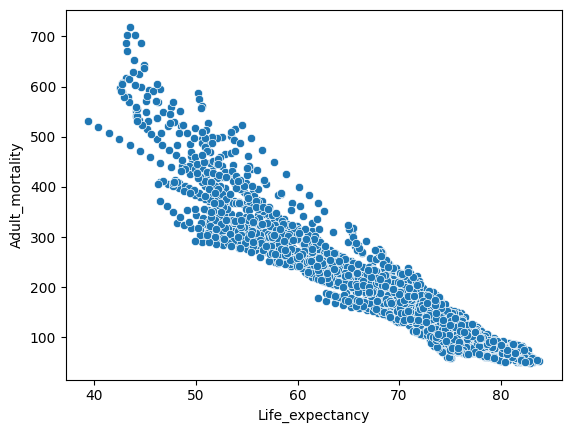

In [ ]:
# Life expectancy vs Adult mortality
sns.scatterplot(x = 'Life_expectancy',
                y = 'Adult_mortality',
                data = df)

plt.show()

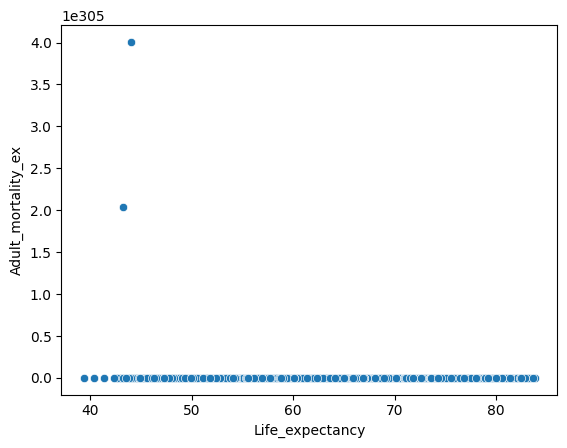

In [ ]:
# Find Exponential:


# Life expectancy vs exp(Adult mortality)
sns.scatterplot(x = 'Life_expectancy',
                y = 'Adult_mortality_ex',
                data = df1)

plt.show()

## **Abnormal Features in the data**

<Axes: >

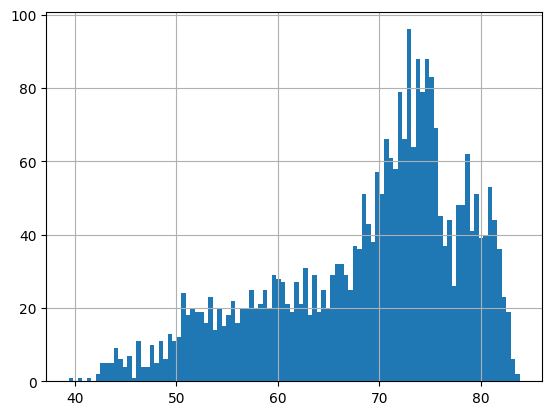

In [ ]:
# Looking for abnormal features in life expectancy distribution
df["Life_expectancy"].hist(bins=100)

Nothing stands out as unusual in this data.

<Axes: >

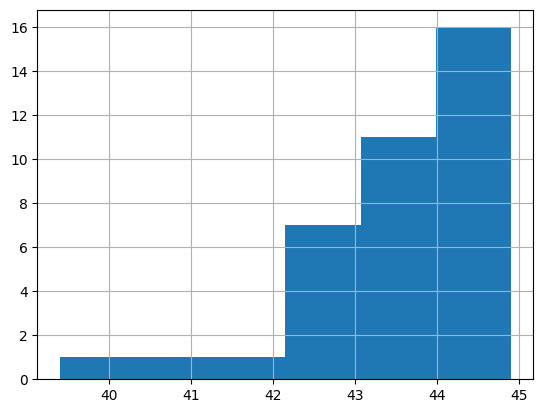

In [ ]:
df["Life_expectancy"][df["Life_expectancy"]<45].hist(bins=6)

In [ ]:
df.corr(numeric_only=True)["Life_expectancy"].abs().sort_values(ascending=False)

Life_expectancy                1.000000
Adult_mortality                0.945360
Under_five_deaths              0.920419
Infant_deaths                  0.920032
Schooling                      0.732484
Polio                          0.641217
Diphtheria                     0.627541
BMI                            0.598423
GDP_per_capita                 0.583090
Incidents_HIV                  0.553027
Economy_status_Developing      0.523791
Economy_status_Developed       0.523791
Measles                        0.490019
Thinness_ten_nineteen_years    0.467824
Thinness_five_nine_years       0.458166
Hepatitis_B                    0.417804
Alcohol_consumption            0.399159
Year                           0.174359
Population_mln                 0.026298
Name: Life_expectancy, dtype: float64

From this series we can point out the strongest correlations to the life expectancy: these columns being = [ Infant_deaths, Under_five_deaths, Adult_mortality, Schooling] these have a correlation of over 0.7. However there are many other correlations ranging between .5 and .7.

In [ ]:
columns = df.columns
columns = columns.drop("Country")
columns = columns.drop("ufd_ex")
columns = columns.drop("inf_ex")
columns = columns.drop("am_ex")

for i in columns:
  df[i].hist()
  plt.xlabel(i)
  plt.show()

KeyError: "['ufd_ex'] not found in axis"

<Axes: title={'center': 'Life_expectancy'}, xlabel='Region'>

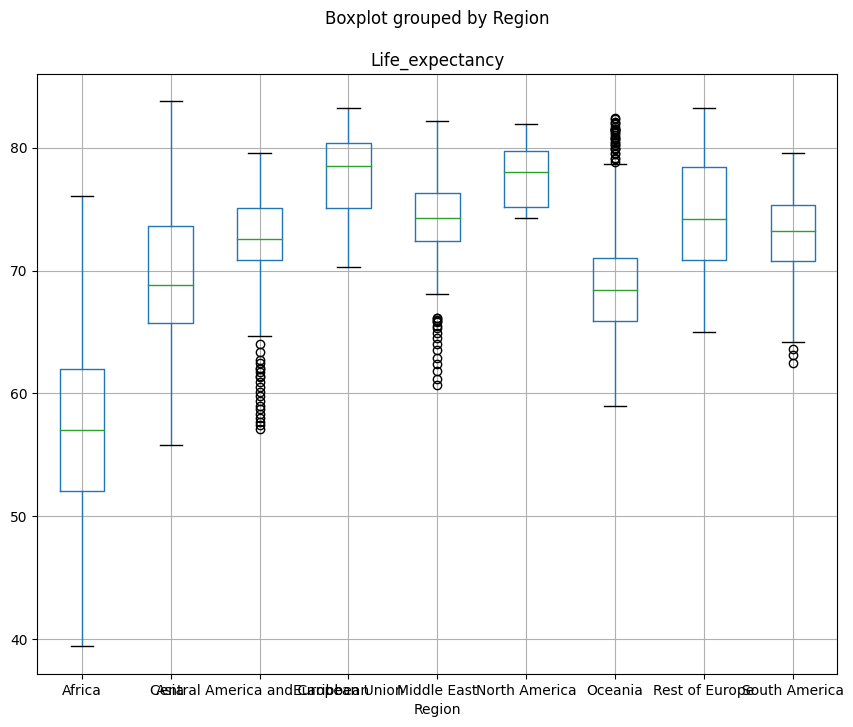

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
df.boxplot(column=['Life_expectancy'], by='Region', ax = ax)